# Olympics Data Analytics

* Importing Libraries

In [117]:
# Numpy
import numpy as np

# Pandas
import pandas as pd

# Regex
import regex as re

# MatPlotLib
import matplotlib.pyplot as plt

# Seaborn
import seaborn as sns

# Plotly
# import plotly.express as px

* Reading Datasets


In [44]:
# athlete=pd.read_csv("https://raw.githubusercontent.com/Naveen-Karanamu/DataSets/master/Olympics%20Datasets/athlete_events.csv?token=GHSAT0AAAAAABRRAV2TH3F7JPAYAXMAP3PEYTQZAGA")
# noc=pd.read_csv("https://raw.githubusercontent.com/Naveen-Karanamu/DataSets/master/Olympics%20Datasets/noc_regions.csv?token=GHSAT0AAAAAABRRAV2TT2EIDEZFBWK7TPBGYTQZAIQ")

In [45]:
athlete=pd.read_csv("./Olympics_Datasets/athlete_events.csv")
noc=pd.read_csv("./Olympics_Datasets/noc_regions.csv")

* Creating the copies of the dataframe

In [46]:
ath=athlete.copy()
nocc=noc.copy()

* Data Exploration

In [47]:
ath.head()

,ID,Name,Gender,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [48]:
nocc.head()

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


* Information about the Athelete df

In [49]:
ath.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Gender  271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


* Description of ath


In [50]:
ath.describe()

,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


* Shape

In [51]:
ath.shape

(271116, 15)

* Null values in ath

In [52]:
ath.isna().sum()

ID             0
Name           0
Gender         0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64

* Creating region column for athlete according to NOC

In [53]:
# ath_reg=[]
# for i in ath.NOC:
#     ath_reg.append(nocc[nocc.NOC==i]['region'])
    
at=ath.merge(nocc,how="left",on="NOC")
    

* Adding extra Conditon for Singapore NOC SGN, SIN

In [54]:
for i in range(271116):
    if(at.Team[i]=='Singapore'or at.Team[i]=="Singapore"):
        at.region[i]='Singapore'

C:\Users\karan\AppData\Local\Temp/ipykernel_6716/3513093546.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  at.region[i]='Singapore'


In [55]:
at.head()

,ID,Name,Gender,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN


# Data Cleaning

* Dropping the notes

In [56]:
at.drop("notes",inplace=True,axis=1)

* Rewritting values of NOC with the values of region

In [57]:
at['NOC']=at.region

* Dropping the reigon column

In [58]:
at.drop('region',axis=1,inplace=True)

* Renaming the NOC column

In [59]:
at.rename(columns={'NOC':'region'},inplace=True)

* Alternative method to do all these

In [60]:
# region_col = ath['NOC'].map(nat.set_index('NOC')['region'])
# ath.insert(7, 'region', region_col)

In [61]:
at.head()

,ID,Name,Gender,Age,Height,Weight,Team,region,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,China,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,China,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,Denmark,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,Denmark,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,Netherlands,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


* Handling NULL values - age, height & weight by the mean of the respective columns

In [62]:
# for i in range(271116):
#     if(at.Age.isna()[i]):
#         at.Age[i]=at.Age.mean()

In [63]:
at.Age.fillna(at.Age.mean(),inplace=True)
at.Height.fillna(at.Height.mean(),inplace=True)
at.Weight.fillna(at.Weight.mean(),inplace=True)

In [64]:
at.isna().sum()

ID             0
Name           0
Gender         0
Age            0
Height         0
Weight         0
Team           0
region        32
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64

* All the values of the region column where the values are NULL

In [65]:
at[at.region.isna()].head()

,ID,Name,Gender,Age,Height,Weight,Team,region,Games,Year,Season,City,Sport,Event,Medal
6267,3515,Paulo Amotun Lokoro,M,24.0,170.0,61.0,Refugee Olympic Athletes,NaN,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,"Athletics Men's 1,500 metres",NaN
7908,4379,Rami Anis,M,25.0,178.0,78.0,Refugee Olympic Athletes,NaN,2016 Summer,2016,Summer,Rio de Janeiro,Swimming,Swimming Men's 100 metres Freestyle,NaN
7909,4379,Rami Anis,M,25.0,178.0,78.0,Refugee Olympic Athletes,NaN,2016 Summer,2016,Summer,Rio de Janeiro,Swimming,Swimming Men's 100 metres Butterfly,NaN
21529,11364,Yiech Pur Biel,M,21.0,178.0,62.0,Refugee Olympic Athletes,NaN,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Men's 800 metres,NaN
31708,16287,Mabika Yolande Bukasa,F,28.0,170.0,70.0,Refugee Olympic Athletes,NaN,2016 Summer,2016,Summer,Rio de Janeiro,Judo,Judo Women's Middleweight,NaN


* Checking if there is any NOC with name ROT and has any region

In [66]:
nocc[nocc.NOC=='ROT']

,NOC,region,notes
168,ROT,NaN,Refugee Olympic Team


* Checking if there is any data of Singapore in noc df

In [67]:
nocc.where(nocc['region']=='Singapore').head()

,NOC,region,notes
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,NaN,NaN,NaN
4,NaN,NaN,NaN


* Total number of data's with the Team name as Singapore

In [68]:
at[at.Team=='Singapore'].count()

ID        338
Name      338
Gender    338
Age       338
Height    338
Weight    338
Team      338
region    338
Games     338
Year      338
Season    338
City      338
Sport     338
Event     338
Medal       9
dtype: int64

* Checking for Refugee Olympic Athletes Team in Athlete df

In [69]:
athlete[athlete.Team=='Refugee Olympic Athletes']

,ID,Name,Gender,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
6267,3515,Paulo Amotun Lokoro,M,24.0,170.0,61.0,Refugee Olympic Athletes,ROT,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,"Athletics Men's 1,500 metres",NaN
7908,4379,Rami Anis,M,25.0,178.0,78.0,Refugee Olympic Athletes,ROT,2016 Summer,2016,Summer,Rio de Janeiro,Swimming,Swimming Men's 100 metres Freestyle,NaN
7909,4379,Rami Anis,M,25.0,178.0,78.0,Refugee Olympic Athletes,ROT,2016 Summer,2016,Summer,Rio de Janeiro,Swimming,Swimming Men's 100 metres Butterfly,NaN
21529,11364,Yiech Pur Biel,M,21.0,178.0,62.0,Refugee Olympic Athletes,ROT,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Men's 800 metres,NaN
31708,16287,Mabika Yolande Bukasa,F,28.0,170.0,70.0,Refugee Olympic Athletes,ROT,2016 Summer,2016,Summer,Rio de Janeiro,Judo,Judo Women's Middleweight,NaN
40238,20693,James Nyang Chiengjiek,M,24.0,179.0,59.0,Refugee Olympic Athletes,ROT,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Men's 400 metres,NaN
119392,60444,Yonas Kinde,M,36.0,172.0,57.0,Refugee Olympic Athletes,ROT,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Men's Marathon,NaN
141669,71067,Anjelina Nadai Lohalith,F,23.0,163.0,50.0,Refugee Olympic Athletes,ROT,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,"Athletics Women's 1,500 metres",NaN
141753,71113,Rose Nathike Lokonyen,F,21.0,157.0,50.0,Refugee Olympic Athletes,ROT,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Women's 800 metres,NaN
149306,74902,Yusra Mardini,F,18.0,157.0,53.0,Refugee Olympic Athletes,ROT,2016 Summer,2016,Summer,Rio de Janeiro,Swimming,Swimming Women's 100 metres Freestyle,NaN


In [70]:
athlete.head()

,ID,Name,Gender,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


* Handling the NULL values in the column 'Medal'

Categories available in the Medal column

In [71]:
# Unique values in the Medal
at.Medal.unique()

array([nan, 'Gold', 'Bronze', 'Silver'], dtype=object)

In [72]:
# Total number of uinique values
at.Medal.nunique()

3

In [73]:
# Strength of the unique values
at.Medal.value_counts()

Gold      13372
Bronze    13295
Silver    13116
Name: Medal, dtype: int64

* Replace NaN:0, Gold:1, Silver:2, Bronze:3

Replacing the Nan's

In [74]:
at.Medal=at.Medal.replace([np.nan],[0])

Replacin Gold, Silver and Bronze

In [75]:
at.Medal.replace(['Gold','Silver','Bronze'],[1,2,3],inplace=True)

In [76]:
at.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Gender  271116 non-null  object 
 3   Age     271116 non-null  float64
 4   Height  271116 non-null  float64
 5   Weight  271116 non-null  float64
 6   Team    271116 non-null  object 
 7   region  271084 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   271116 non-null  int64  
dtypes: float64(3), int64(3), object(9)
memory usage: 41.2+ MB


* Drop the region and Games columns

In [77]:
at.drop(['region','Games'],inplace=True,axis=1)

In [78]:
at.head()

,ID,Name,Gender,Age,Height,Weight,Team,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.00000,80.000000,China,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,0
1,2,A Lamusi,M,23.0,170.00000,60.000000,China,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,0
2,3,Gunnar Nielsen Aaby,M,24.0,175.33897,70.702393,Denmark,1920,Summer,Antwerpen,Football,Football Men's Football,0
3,4,Edgar Lindenau Aabye,M,34.0,175.33897,70.702393,Denmark/Sweden,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,1
4,5,Christine Jacoba Aaftink,F,21.0,185.00000,82.000000,Netherlands,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,0


* Clean Events column

In [93]:
clean_event=re.sub(at.Sport[0]+" ","",str(at.Event[0]))
clean_event

"Men's Basketball"

In [97]:
for i in range(271116):
    at.Event[i]=re.sub(at.Sport[i]+" ","",at.Event[i])

In [98]:
at.head()

,ID,Name,Gender,Age,Height,Weight,Team,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.00000,80.000000,China,1992,Summer,Barcelona,Basketball,Men's Basketball,0
1,2,A Lamusi,M,23.0,170.00000,60.000000,China,2012,Summer,London,Judo,Men's Extra-Lightweight,0
2,3,Gunnar Nielsen Aaby,M,24.0,175.33897,70.702393,Denmark,1920,Summer,Antwerpen,Football,Men's Football,0
3,4,Edgar Lindenau Aabye,M,34.0,175.33897,70.702393,Denmark/Sweden,1900,Summer,Paris,Tug-Of-War,Men's Tug-Of-War,1
4,5,Christine Jacoba Aaftink,F,21.0,185.00000,82.000000,Netherlands,1988,Winter,Calgary,Speed Skating,Women's 500 metres,0


In [ ]:
at.info()

* Changing the Age datatype to int

In [ ]:
at.Age=at.Age.astype(int)

# Data Exportation


In [ ]:
# Exporting the data to csv formate
at.to_csv("New_data.csv")

# Exporting the data to json formate
at.to_json("New_data.json")

# Exporting the data to exel formate
at.to_excel("New_data.xlxs")

# Data Analytics

* Relationship between Height and Weight

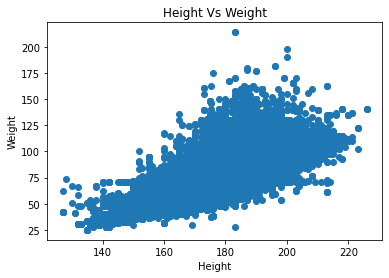

In [101]:
x=at.Height
y=at.Weight
plt.title("Height Vs Weight")
plt.xlabel("Height")
plt.ylabel("Weight")
plt.scatter(x,y)

Insights: Height is directly proportional to the weight

* Males Vs Females who participated in the olympics during 1896 to 2016

<AxesSubplot:>

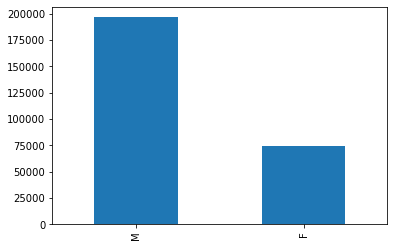

In [110]:
at.Gender.value_counts().plot.bar(at.Gender)

* How many Male's and Females's have participated in the summer and winter olympics

<AxesSubplot:xlabel='Season,Gender'>

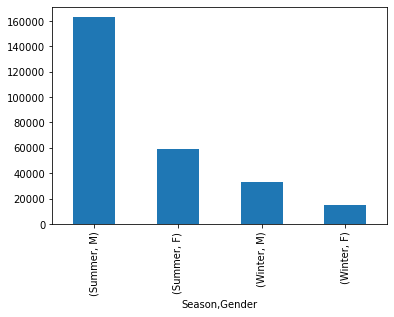

In [115]:
at.Gender.groupby(at.Season).value_counts().plot.bar(at.Gender)

* Name top 5 countries with more number of medals


In [134]:
at.groupby(at.Team)['Medal'].count().sort_values(ascending=False).head()

Team
United States    17847
France           11988
Great Britain    11404
Italy            10260
Germany           9326
Name: Medal, dtype: int64

(array([1., 1., 1., 1., 0., 0., 0., 0., 0., 1.]),
 array([ 9326. , 10178.1, 11030.2, 11882.3, 12734.4, 13586.5, 14438.6,
        15290.7, 16142.8, 16994.9, 17847. ]),
 <BarContainer object of 10 artists>)

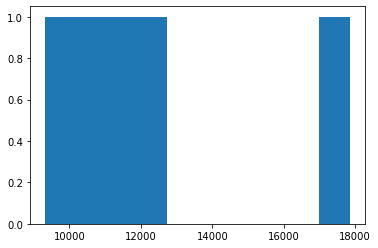

In [137]:
x=at.groupby(at.Team)['Medal'].count().sort_values(ascending=False).head()
plt.hist(x)